# Topic Modeling — CSV Files

[Download relevant files here](https://melaniewalsh.org/Topic-Modeling.zip)

<img src="https://pngimg.com/uploads/palette/palette_PNG68293.png">

In these lessons, we're learning about a text analysis method called **topic modeling**. This method will help us identify the main topics or discourses within a collection of texts (or within a single text that has been separated into smaller text chunks).

In this particular lesson, we're going to use [Little MALLET Wrapper](https://github.com/maria-antoniak/little-mallet-wrapper), a Python wrapper for [MALLET](http://mallet.cs.umass.edu/topics.php), to topic model a CSV file with 5,000 Reddit posts from the subreddit [r/AmITheAsshole](https://www.reddit.com/r/AmItheAsshole/). This is an online forum where people share their personal conflicts and ask the community to judge who's the a**hole in the story.

# What You Need To Get Started

*If you're working in this Jupyter notebook on your own computer, you'll need to have both the Java Development Kit and MALLET pre-installed. For set up instructions, please see [the previous lesson](http://melaniewalsh.github.io/Intro-Cultural-Analytics/Text-Analysis/Topic-Modeling-Set-Up.html).

*If you're working in this Jupyter notebook in the cloud via Binder, then the Java Development Kit and Mallet will already be installed. You're good to go!

# Set MALLET Path

Since Little MALLET Wrapper is a Python package built around MALLET, we first need to tell it where the bigger, Java-based MALLET lives.

We're going to make a variable called `path_to_mallet` and assign it the file path of our MALLET program. We need to point it, specifically, to the "mallet" file inside the "bin" folder inside the "mallet-2.0.8" folder. 

Run the cell below if you're working in the cloud via Binder or if MALLET if is located in your current directory:

In [ ]:
path_to_mallet = 'mallet-2.0.8/bin/mallet'

Uncomment and run the cell below if MALLET is in your home directory on a Mac:

In [5]:
#path_to_mallet = '~/mallet-2.0.8/bin/mallet' 

Uncomment and run the cell below if MALLET is in your C:/ directory on a Windows computer:

In [6]:
#path_to_mallet = 'C:/mallet-2.0.8/bin/mallet'

If MALLET is located in another directory, then set your `path_to_mallet` to that file path.

*Remember that "uncomment" means delete the initial `#`*

*Remember that the tilde `~` automatically fills in your home directory on Mac/Linux machines*

# Import Libraries

In [7]:
#!pip install little_mallet_wrapper
#!pip install seaborn

Now let's `import` the `little_mallet_wrapper` and the data viz library `seaborn`.

In [8]:
import little_mallet_wrapper
import seaborn

We're also going to import the `random` module for generating random numbers; the `pandas` library for reading CSV data (we're also changing its default column width display setting); and  [`glob`](https://docs.python.org/3/library/glob.html) and [`pathlib`](https://docs.python.org/3/library/pathlib.html#basic-use) for working with files and the file system.

In [9]:
import random

In [10]:
import pandas as pd
pd.set_option("max_colwidth", 500)

In [11]:
import glob
from pathlib import Path

# Get Training Data From CSV File

Before we topic model the Reddit posts, we need to process the posts and prepare them for analysis. The steps below demonstrate how to process texts if they come from a CSV file.

Note: We're calling these text files our *training data*, because we're *training* our topic model with these texts. The topic model will be learning and extracting topics based on these texts.

## Reddit — Am I The Asshole?

This dataset of Reddit posts is a sample of a larger dataset published by [Elle O'Brien](https://dvc.org/blog/a-public-reddit-dataset) and [Iterative](https://github.com/iterative/aita_dataset). To read in the CSV file, we're going to use Pandas.

In [13]:
reddit_df = pd.read_csv("../texts/social-media/reddit-aita-sample.csv")

In [14]:
reddit_df.head()

,id,date,title,body,edited,verdict,score,num_comments,is_asshole
0,edvd64,2019-12-21,AITA if I stop talking to my best friend for choosing her bf over me,"I have been best friends with this person for over 13 years and just recently she (23f) just started dating a guy who is 40 and is a yoga teacher/float guide, doesn’t have a stable job, doesn’t have a home, and travels a lot. They constantly break up with eachother because he has dreams that she is cheating on him with a girl and she doesn’t want to acknowledge her identity. He thinks she is going to cheat on him with ME. My best friend has identified as being bisexual however I am in a very...",False,not the asshole,5,9.0,0
1,dk3p0w,2019-10-19,AITA for calling the police on my neighbors son?,"I've recently noticed the garden near my fence looking a little different - trees suddenly missing branches, shrubbery looking a lot smaller, certain plants looking damaged. At first I thought I was imagining things, but over time I realized there was absolutely a difference and it was only getting worse. I wasn't sure what exactly could be causing it, and at first I assumed it could be animals until I actually got in there and started inspecting things. When I did that, I noticed it was as ...",1571492660.0,not the asshole,8,67.0,0
2,aibiat,2019-01-21,AITA for having a half-day off on Dr. MLK Jr. Day?,"I work full-time in a blue collar profession. I also am a full-time biology student.\n\nAt the start of this school semester when asked what my schedule will be for school and what I needed off I texted my boss back this:\n\n""All I need off is the mornings of Mon and Tues . . . will need to come in at 12 those days.""\n\nHer reply was this:\n\n""Ok. so you will work everyday just come in at 12 on Mon and Tues . . . got it""\n\nThis has worked since the start of the semester.\n\nFast forward to...",1548096430.0,not the asshole,6,33.0,0
3,esrb1g,2020-01-23,"AITA for ""stealing"" a hamster from someone who didn't look after it","AITA for stealing a hamster from someone who neglects/mistreats it. I had a friend (loosely using the term) who since I've gotten to know them more is a bit of a twat. Little hammer wasn't abused persay but the little dude wasn't being properly cleaned out, wasn't being fed properly and my 'friend' teased him by dropping food pellets on him, bedding and just generally agitating him. I agonised over it for a bit before deciding to rescue the lad and walked out of my friend's place with the ca...",1579776211.0,asshole,63,65.0,1
4,cz27cm,2019-09-03,AITA for talking to my sisters husband (who is currently incarcerated) regularly?,"I feel as if I have gotten myself in quite a pickle here. Quick run down goes as follows. Sisters husband is in jail for hit and run (to make matters worse, he was also driving on a revoked license). Hitting someone’s motorcycle and drove off is what it entailed. \n\nNow, none of my family is speaking to him. My sister at the moment doesn’t want to deal with him (the reason he was driving on a revoked is due to DUI). From my understanding he has been clean for quite some time. \n\nBasically ...",False,asshole,1704,600.0,1


In [15]:
reddit_df['body'] = reddit_df['body'].astype(str)

### Process Reddit Posts

`little_mallet_wrapper.process_string(text, numbers='remove')`

Next we're going to process our texts with the function `little_mallet_wrapper.process_string()`. This function will take every individual post, transform all the text to lowercase as well as remove stopwords, punctuation, and numbers, and then add the processed text to our master list `training_data`.

In [16]:
training_data = [little_mallet_wrapper.process_string(text, numbers='remove') for text in reddit_df['body']]

In [17]:
original_texts = [text for text in reddit_df['body']]

### Process Reddit Post Titles

We're also going to extract the file name for each Reddit post.

In [18]:
reddit_titles = [title for title in reddit_df['title']]

### Get Dataset Statistics

We can get training data summary statisitcs by using the funciton `little_mallet_wrapper.print_dataset_stats()`.

In [19]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 5000
Mean Number of Words: 148.1
Vocabulary Size: 22854


# Training the Topic Model

`little_mallet_wrapper.train_topic_model(path_to_mallet,
                      path_to_formatted_training_data,
                      path_to_model,
                      path_to_topic_keys,
                      path_to_topic_distributions,
                      num_topics)`

We're going to train our topic model with the `little_mallet_wrapper.train_topic_model()` function. As you can see above, however, this function requires 6 different arguments and file paths to run properly:

- `path_to_mallet`
- `path_to_formatted_training_data`
- `path_to_model`
- `path_to_topic_keys`
- `path_to_topic_distributions`
- `num_topics`

So we have to set a few things up first.

## Set Number of Topics

We need to make a variable `num_topics` and assign it the number of topics we want returned.

In [20]:
num_topics = 15

## Set Training Data

We already made a variable called `training_data`, which includes all of our processed Reddit post texts, so we can just set it equal to itself.

In [21]:
training_data = training_data

## Set Other MALLET File Paths

Then we're going to set a file path where we want all our MALLET topic modeling data to be dumped. I'm going to output everything onto my Desktop inside a folder called "topic-model-output" and a subfolder specific to the Reddit posts called "Reddit."

All the other necessary variables below `output_directory_path` will be automatically created inside this directory.

In [22]:
#Change to your desired output directory
output_directory_path = 'topic-model-output/reddit'

#No need to change anything below here
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

## Import Data

We're going to import the data with `little_mallet_wrapper.import_data()`.

In [23]:
little_mallet_wrapper.import_data(path_to_mallet,
                path_to_training_data,
                path_to_formatted_training_data,
                training_data)

Importing data...
Complete


## Train Topic Model

Then we're going to train our topic model with `little_mallet_wrapper.train_topic_model()`. The topic model should take about 1-1.5 minutes to train and complete. If you want it, you can look at your Terminal or PowerShell and see what the model looks like as it's training.

In [25]:
little_mallet_wrapper.train_topic_model(path_to_mallet,
                      path_to_formatted_training_data,
                      path_to_model,
                      path_to_topic_keys,
                      path_to_topic_distributions,
                      num_topics)

Training topic model...
Complete


# Display Topics and Top Words

To examine the 15 topics that the topic model extracted from the Reddit posts, run the cell below. This code uses the `little_mallet_wrapper.load_topic_keys()` function to read and process the MALLET topic model output from your computer, specifically the file "mallet.topic_keys.15".

In [27]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

✨Topic 0✨

['said', 'didn', 'told', 'friend', 'got', 'friends', 'asked', 'back', 'went', 'would', 'wanted', 'later', 'saying', 'call', 'one', 'wasn', 'could', 'thought', 'came', 'still']

✨Topic 1✨

['play', 'like', 'dont', 'playing', 'game', 'said', 'games', 'people', 'one', 'didnt', 'around', 'time', 'started', 'back', 'get', 'show', 'music', 'friends', 'got', 'movie']

✨Topic 2✨

['school', 'help', 'would', 'years', 'feel', 'life', 'also', 'still', 'even', 'time', 'get', 'started', 'issues', 'could', 'much', 'year', 'going', 'since', 'bad', 'high']

✨Topic 3✨

['work', 'job', 'one', 'class', 'people', 'told', 'company', 'know', 'boss', 'working', 'manager', 'would', 'office', 'new', 'everyone', 'well', 'school', 'teacher', 'business', 'worked']

✨Topic 4✨

['car', 'back', 'get', 'front', 'minutes', 'guy', 'went', 'people', 'right', 'way', 'away', 'walk', 'drive', 'around', 'one', 'aita', 'driving', 'see', 'store', 'walking']

✨Topic 5✨

['room', 'house', 'apartment', 'roommate', 'ho

# Load Topic Distributions

MALLET also calculates the likely mixture of these topics for every single Reddit post in the corpus. This mixture is really a probability distribution, that is, the probability that each topic exists in the document. We can use these probability distributions to examine which of the above topics are strongly associated with which specific posts.

To get the topic distributions, we're going to use the `little_mallet_wrapper.load_topic_distributions()` function, which will read and process the MALLET topic model output, specifically the file "mallet.topic_distributions.15". 

In [28]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

In [29]:
topic_distributions[0]

[0.14942528735632182,
 0.0028735632183908046,
 0.13218390804597702,
 0.020114942528735632,
 0.08045977011494253,
 0.0028735632183908046,
 0.011494252873563218,
 0.0028735632183908046,
 0.020114942528735632,
 0.08908045977011494,
 0.40804597701149425,
 0.0028735632183908046,
 0.05459770114942528,
 0.020114942528735632,
 0.0028735632183908046]

It's a bit easier to understand if we pair these probabilities with the topics themselves. As you can see below, Topic 6 "family wedding party want birthday would" has a relatively high probability of existing in the Reddit post "AITA for not attending holiday gatherings?" `.124` while Topic 14 "dog cats dog house would take" has a relatively low probability `.006`.

In [30]:
reddit_post_to_check = "AITA for not attending holiday gatherings?"

reddit_post_number = reddit_titles.index(reddit_post_to_check)

print(f"Topic Distributions for {reddit_titles[reddit_post_number]}\n")
for topic_number, (topic, topic_distribution) in enumerate(zip(topics, topic_distributions[reddit_post_number])):
    print(f"✨Topic {topic_number} {topic[:6]} ✨\nProbability: {round(topic_distribution, 3)}\n")

Topic Distributions for AITA for not attending holiday gatherings?

✨Topic 0 ['said', 'didn', 'told', 'friend', 'got', 'friends'] ✨
Probability: 0.153

✨Topic 1 ['play', 'like', 'dont', 'playing', 'game', 'said'] ✨
Probability: 0.001

✨Topic 2 ['school', 'help', 'would', 'years', 'feel', 'life'] ✨
Probability: 0.048

✨Topic 3 ['work', 'job', 'one', 'class', 'people', 'told'] ✨
Probability: 0.018

✨Topic 4 ['car', 'back', 'get', 'front', 'minutes', 'guy'] ✨
Probability: 0.023

✨Topic 5 ['room', 'house', 'apartment', 'roommate', 'home', 'clean'] ✨
Probability: 0.06

✨Topic 6 ['family', 'wedding', 'party', 'want', 'birthday', 'would'] ✨
Probability: 0.124

✨Topic 7 ['money', 'pay', 'would', 'get', 'job', 'paid'] ✨
Probability: 0.001

✨Topic 8 ['like', 'said', 'think', 'people', 'really', 'thought'] ✨
Probability: 0.001

✨Topic 9 ['time', 'work', 'home', 'day', 'get', 'week'] ✨
Probability: 0.305

✨Topic 10 ['friends', 'friend', 'like', 'relationship', 'together', 'time'] ✨
Probability: 0.

# Explore Heatmap of Topics and Texts

`little_mallet_wrapper.plot_categories_by_topics_heatmap(all_labels,
                                      topic_distributions,
                                      topics, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim= (10, 9)
                                     )`

We can visualize and compare these topic probability distributions with a heatmap by using the `little_mallet_wrapper.plot_categories_by_topics_heatmap()` function. This function requires six arguments and file paths:

* `all_labels` all the labels for the texts in your collection 
* `topic_distributions` your list of topic distributions
* `topics` your list of topics 
* `output_directory_path + '/categories_by_topics.pdf'` the file path where you want to save a PDF of the heatmap
* `target_labels=target_labels` the sample of texts that you want to visualize 
* `dim= (10, 9)` the size or dimensions of the heatmap

We have everything we need for the heatmap except for our list of `target_labels`, the sample of texts that we'd like to visualize and compare with the heatmap. Below we make our list of desired target labels.

In [31]:
target_labels = ["AITA For putting a dog poop bag sidewalk and picking it up on my way home?",
 "AITA for telling my friend that she shouldn't get a tattoo?",
 "AITA for cutting off all contact with my dad?",
 "AITA for being upset/disappointed my bf went and worked out when we had arranged to go to the cinema for a date without letting me know he was going to be late?",
 "WIBTA if I refused to pay for half of the groceries when my boyfriend eats all of the things I get for myself?",
 "WIBTA if I got students from my school to sign a petition to have a teacher 'talked' too?",
 "AITA if I don't invite my aunt to my birthday"]

If you'd like to make a random list of target labels, you can uncomment and run the cell below.

In [32]:
#target_labels = random.sample(reddit_titles, 7)

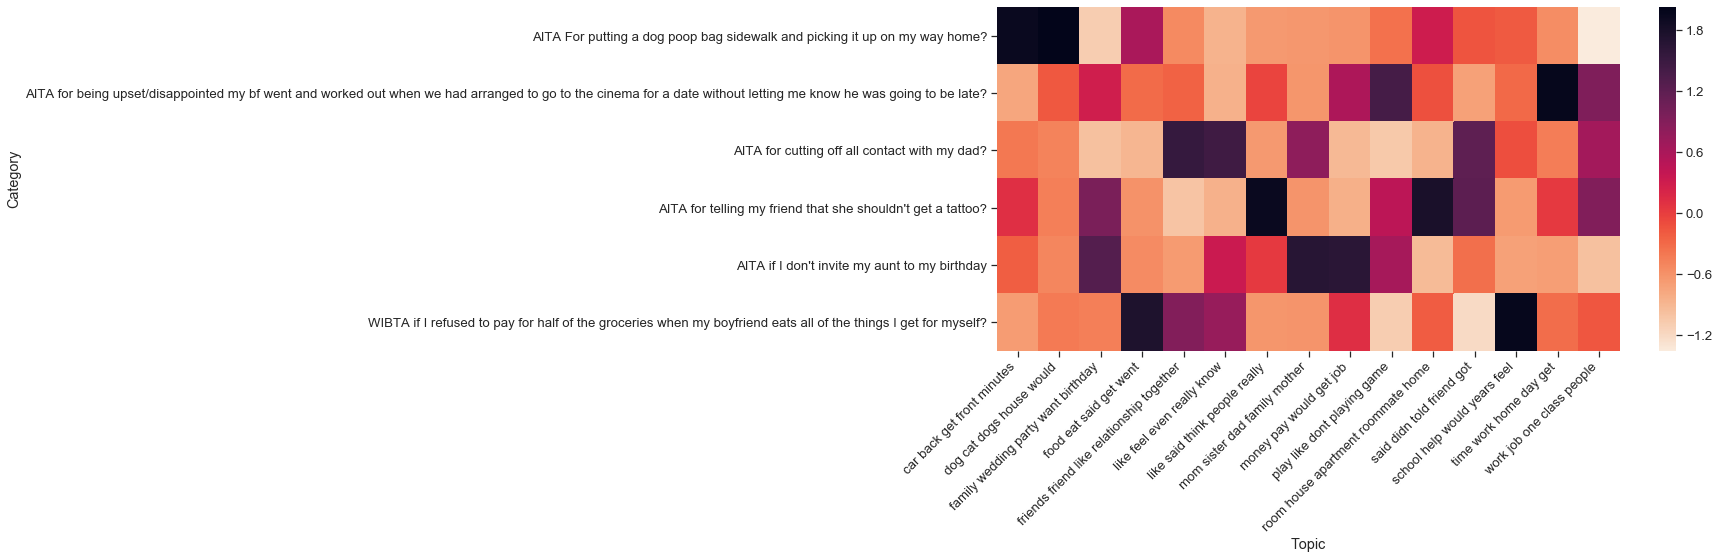

In [33]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(reddit_titles,
                                      topic_distributions,
                                      topics, 
                                      #output_directory_path + '/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim= (25, 8)
                                     )

# Display Top Titles Per Topic

`little_mallet_wrapper.get_top_docs(training_data,
                                    topic_distributions,
                                    topic=topic_number,
                                    n=number_of_documents)`

We can also display the Reddit posts and titles that have the highest probability for every topic with the `little_mallet_wrapper.get_top_docs()` function.

In [40]:
training_data_reddit_titles = dict(zip(training_data, reddit_titles))
training_data_original_text = dict(zip(training_data, original_texts))

We'll make our own function `display_top_titles_per_topic()` that will display the top Reddit post titles for every topic. This function accepts a given `topic_number` as well as a desired `number_of_documents` to display.

In [41]:
def display_top_titles_per_topic(topic_number=0, number_of_documents=5):
    
    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        print(round(probability, 4), training_data_reddit_titles[document] + "\n")
    return

**Topic 0**

To display the top 5 Reddit post titles with the highest probability of containing Topic 0, we will run:

In [42]:
display_top_titles_per_topic(topic_number=0, number_of_documents=5)

✨Topic 0✨

['said', 'didn', 'told', 'friend', 'got', 'friends', 'asked', 'back', 'went', 'would', 'wanted', 'later', 'saying', 'call', 'one', 'wasn', 'could', 'thought', 'came', 'still']

0.6461 AITA for not listening to a friend? [19M]

0.6388 AITA for telling a classmate that my friends were accusing her behind her back of giving out my best friend's number to a stranger?

0.637 AITA for going out with my gfs sister for her birthday ?

0.6138 AITA for saying my friend was being childish?

0.5978 AITA for not attending my friends wedding for how they treated a mutual friend?



**Topic 9**

To display the top 5 Reddit post titles with the highest probability of containing Topic 9, we will run:

In [43]:
display_top_titles_per_topic(topic_number=9, number_of_documents=5)

✨Topic 9✨

['time', 'work', 'home', 'day', 'get', 'week', 'would', 'hours', 'said', 'going', 'days', 'night', 'take', 'back', 'come', 'got', 'last', 'really', 'since', 'didn']

0.7216 AITA for not making my boyfriend breakfast?

0.7129 WIBTA for going to the gym instead of spending that time with my child ?

0.6537 AITA for wanting to sleep by myself?

0.6468 AITA for wanting to stay home to do my homework than go to a Valentines dance with my girlfriend?

0.6181 AITA for telling my SO when to come home from work?



**Topic 8**

To display the top 7 Reddit posts with the highest probability of containing Topic 8, we will run:

In [44]:
display_top_titles_per_topic(topic_number=8, number_of_documents=7)

✨Topic 8✨

['like', 'said', 'think', 'people', 'really', 'thought', 'didn', 'something', 'know', 'asshole', 'say', 'name', 'pretty', 'look', 'one', 'wasn', 'first', 'girl', 'also', 'would']

0.6111 AITA for telling my date she's not black and needs to stop pretending

0.5867 AITA for pushing back about an image being racist?

0.5774 AITA for making a joke about a black girl’s skin?

0.5658 AITA for telling my skinny friend to stop calling herself curvy?

0.5627 AITA for telling my Muslim friends if I were Muslim I wouldn’t name my kid Mohammed

0.5584 AITA for saying asexual people don't have to "come out"?

0.5556 AITA for calling my friend "evil" in a joking way??



# Display Topic Words in Context of Original Text

Often it's useful to actually look at the document that has ranked highly for a given topic and puzzle out why it ranks so highly.

To display the original Reddit post texts that rank highly for a given topic, with the relevant topic words **bolded** for emphasis, we are going to make the function `display_bolded_topic_words_in_context()`.

In the cell below, we're importing two special Jupyter notebook display modules, which will allow us to make the relevant topic words **bolded**, as well as the regular expressions library `re`, which will allow us to find and replace the correct words.

In [45]:
from IPython.display import Markdown, display
import re

def display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3, custom_words=None):

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        
        print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")
        
        probability = f"✨✨✨\n\n**{probability}**"
        reddit_title = f"**{training_data_reddit_titles[document]}**"
        original_text = training_data_original_text[document]
        topic_words = topics[topic_number]
        topic_words = custom_words if custom_words != None else topic_words

        for word in topic_words:
            if word in original_text:
                original_text = re.sub(f"\\b{word}\\b", f"**{word}**", original_text)

        display(Markdown(probability)), display(Markdown(reddit_title)), display(Markdown(original_text))
    return

**Topic 3**

To display the top 3 original Reddit posts with the highest probability of containing Topic 0 and with relevant topic words bolded, we will run:

In [46]:
display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3)

✨Topic 3✨

['work', 'job', 'one', 'class', 'people', 'told', 'company', 'know', 'boss', 'working', 'manager', 'would', 'office', 'new', 'everyone', 'well', 'school', 'teacher', 'business', 'worked']



✨✨✨

**0.6047619047619048**

**AITA for terminating the employment of an immigrant which will lead to them being deported**

I am on the board of a non profit in the US. An employee of ours is on a **work** visa and a condition of her visa is that she must remain employed full time doing the type of **work** our organization does. We have had numerous challenges with this employee which fall into the category of the employee not performing up to the standard expected and being unreceptive to feedback to improve performance. We ended up voting to terminate their employment in two months and informed the employee of this. Their termination will result in them being forced to leave the county along with their spouse and two kids. They **would** have to return to Mexico in about 3 months. It is highly unlikely the employee will be able to find other employment which **would** enable them do stay in the US given their visa conditions. So AITA for terminating this employee?

✨Topic 3✨

['work', 'job', 'one', 'class', 'people', 'told', 'company', 'know', 'boss', 'working', 'manager', 'would', 'office', 'new', 'everyone', 'well', 'school', 'teacher', 'business', 'worked']



✨✨✨

**0.5690235690235691**

**WIBTA if I asked for a higher wage when I’m forced to train new employees?**

When I was hired at my current **job** management went over my responsibilities and there was no mention of me training **new** employees. About four months in I was asked to train a **new** hire because they had no **one** else during that time frame. I agreed, but what was expected of me was to spend 7+ hours having this employee shadow me while I’m interacting with customers, and then me shadow them, while going over a 70 page manual for four to five days. It’s very draining and doubles my workload, and I find I preform better while doing my **job** solo. I’ve been asked to train many more times now because my **boss** likes my training style, and now she prefers me to train every **new** hire, but I hate training. I found out from another coworker that my **boss** has scheduled me to train someone **new** next week, but I think I should be getting compensated for all the extra **work** I’m doing. WIBTA if I emailed my **boss** asking that if she wants me to continue training **new** employees that I **would** like a higher hourly wage or extra benefits? Or **would** I be damaging my reputation/relationship with my **boss** if I do this?

✨Topic 3✨

['work', 'job', 'one', 'class', 'people', 'told', 'company', 'know', 'boss', 'working', 'manager', 'would', 'office', 'new', 'everyone', 'well', 'school', 'teacher', 'business', 'worked']



✨✨✨

**0.526797385620915**

**AITA for going through a clearance interview and wasting the officer’s time when the job that requires a clearance was withdrawn?**

Second post on this throwaway, again, small community and I am a federal employee.
Back story:

I was in the military from 2003 to 2014.  My original intentions were to make it a career, but I had some trouble in 2013, bad enough where I was interviewed by investigators. My commander also ordered me to do a mental health evaluation.  
Based on the mental health eval, the commander recommended me for an admin discharge board because I was diagnosed with an adjustment disorder.  To fight this, I got two add’l evals (**one** off base, **one** on base) to prove this diagnoses wrong. It **worked** and the discharge board was cancelled.  But the commander wasn’t happy I proved him wrong, so he opted to take my clearance because “You revealed too much personal info with the investigators to be trusted.”  (I had high debt of $5K, I liked to drink, I like to flirt with women even though I’m married, I like to gamble, I had a roe with my direct supervisor over an eval rating, and I made comments about visiting a middle east country). 

At the end of 2013, I got an email stating I was selected to be Force Reduction in 2014...great!  

In 2014, while my clearance was in the process to be revoked, I fought it with every ounce of energy I had, but I was forced out in Sept 2014.  I never received a formal notice that my clearance was revoked. 

Now here’s the catch-22 about clearances: If its is revoked while you are **working** for the gov’t, you can fight to get it back...but if you’re not **working** with the gov’t, you cannot.  You cannot apply for a clearance yourself because you don’t need it. And if you have a bad record, without a **job**, you cannot appeal it to anyone because you cannot appeal something you don’t need but Without a clearance, you cannot apply for certain jobs...you get the picture (I hope).

Well, I applied for a federal **job** in Jan 2016 that doesn’t require a clearance and was hired on in July 2016.

Fast Forward to July 2019, I am browsing for overseas federal jobs.  I found **one** in Asia.  The **job** looked promising and I was offered an initial offer in Nov 2019 with a firm offer if I get a clearance.  So, I start the process all over again for a clearance.  Then out of nowhere, I got an email that the **job** offer was withdrawn because it **would** take a long time to complete a clearance check.  HOWEVER, last week, a clearance officer contacted me to go over my application for a clearance and schedule an interview.  Granted I should’ve said that the **job** was withdrawn, but I thought...fuck it! Here’s my chance to finally clear my name!

The interview was almost 3 hours long. My entire military history was reviewed, along with any discrepancies in my application.  I gave my entire point of views on everything. When it was over, The investigator said a decision will be made later on about granting me a clearance for my **new** **job**.  But again, the **job** offer was withdrawn and I don’t need the clearance, so am I an AH for wasting the investigator’s time and gov’t resources?

**Topic 8**

To display the top 3 original Reddit posts with the highest probability of containing Topic 8 and with relevant topic words bolded, we will run:

In [48]:
display_bolded_topic_words_in_context(topic_number=14, number_of_documents=3)

✨Topic 14✨

['dog', 'cat', 'dogs', 'house', 'would', 'take', 'get', 'home', 'one', 'neighbor', 'time', 'cats', 'care', 'want', 'outside', 'around', 'keep', 'neighbors', 'like', 'let']



✨✨✨

**0.6618357487922705**

**WIBTA if I took my neighbor's cat to a shelter?**

My **neighbor** has a small scrawny **cat** that they got in the winter, it wasn't adopted from a shelter. She isn't spayed, doesn't have shots, and they don't **let** her inside. They kept her **outside** even as a kitten in the winter. I'll feed her when she looks **like** she hasn't eaten in a while.

She hangs in my yard all day and doesn't look great. She's thin, has fleas, and has scabs all over her and **around** her eyes. She goes to the bathroom in my yard and it doesn't look **like** normal **cat** poop. She definitely isn't healthy. 

I have a **cat** of my own who goes **outside** when I'm **outside** and is inside the rest of the **time**. When my **cat** is out, my **neighbor**'s **cat** follows him **around** and they play. The issue is that I don't **want** my **cat** getting sick or getting fleas from her. I even put a flea collar on her, but that only lasted a couple of days before it was gone. 

I feel bad for her but I honestly don't **want** another **cat** (my **neighbors** wouldn't **care** if I took her in, I wouldn't be surprise if they **want** me to **take** her off their hands). I adopted my **cat** from a shelter, he's fixed, up to date on shots, & eats real good (read: spoiled). I don't **want** the responsibility of a second **cat**, **let** alone a sick **one**. I **want** to **take** her to a shelter so at least she'll be fed & indoors. WIBTA if I did this? My **neighbors** don't treat her as their own and they wouldn't miss her.

Edit: I've told them where to **get** her spayed and shots for free but they're not interested. They have a small **dog** they **take** **care** of though.

✨Topic 14✨

['dog', 'cat', 'dogs', 'house', 'would', 'take', 'get', 'home', 'one', 'neighbor', 'time', 'cats', 'care', 'want', 'outside', 'around', 'keep', 'neighbors', 'like', 'let']



✨✨✨

**0.5708333333333333**

**AITA for tying my neighbor’s dog to his door?**

My **neighbors** got a new **dog**, a smart boarder collie type **dog** who is full size but very much still a puppy. We live on a small street in a rural setting, most **neighbors** have an acre, we have 3. The **neighbor** in question lives a few houses down. 

For the past week, this **dog** has run **around** on its own for several hours during the day. She’ll be at our place barking at our two **cats**, barking at the chicken coop and generally letting us know she’s there. We **like** letting our chickens out to scratch **around** the yard but can’t knowing she could be over. It’s important to add that another **neighbor** has a **dog** who is always roaming on its own and frequently in our yard, but he’s way more tame and doesn’t bother chickens or **cats** so we don’t mind at all. 

Anyway, this past weekend we tried each day to **take** the **dog** **home**. Both times we knocked but the **neighbor** didn’t answer. The second **time** we decided to try tying her to their door, but the string broke so that didn’t last a second. We left the string on their door and the **dog** hoping that **would** send a message. 

It did. My **neighbor** came over pretty angry that we did something “passive aggressive” instead of talking to him. He said he’ll **keep** the **dog** at his **house** since it’s a problem but “nobody told him.” Another **neighbor** told us that **dog** kept jumping on his daughter and was also a pain to him. The rope really was meant to **keep** the **dog** at his **house** but we also hoped it **would** send a message. Since the **neighbor** was nice but angry now I feel bad and am not sure, AITA?

TL/DR: **neighbor**’s **dog** kept bothering our **cats**, chickens and us so we tried knocking but tied the **dog** to his door.

✨Topic 14✨

['dog', 'cat', 'dogs', 'house', 'would', 'take', 'get', 'home', 'one', 'neighbor', 'time', 'cats', 'care', 'want', 'outside', 'around', 'keep', 'neighbors', 'like', 'let']



✨✨✨

**0.5691056910569106**

**AITA For running late at night (10pm-12am) and waking the neighbors due to their barking dogs?**

When I run late at night in my neighborhood some of the houses I run past have **dogs** and they start barking at me from inside their **house** (supposedly disturbing their owners).  I run laps so I pass the same houses 5 or more times per night as I run. I've been asked to **take** a different route or not run so late. Is it my fault that their **dogs** bark at me? I usually have headphones on so I can't hear the **dogs**.